In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import h5py    
from dataset import Dataset
import os

In [3]:
from analyze_utils import PointCloudAnalyzer
from visualize_utils import Visualizer

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from mpl_toolkits.mplot3d import axes3d
mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 24})

In [4]:
from sample_3d_view import sample_sphere, sample_torus, visualize_grid_sphere, visualize_grid_torus, sample_ellipsoid, genus_two, genus_three

In [5]:
root = os.getcwd()
dataset_name = 'shapenetcorev2'
split = 'test'

d = Dataset(root=root, dataset_name=dataset_name, num_points=2048, split=split)
ps, lb, n, f = d[:]
np.where(np.array(n)=='mug')
ps, lb, n, f = d[117]
data = ps.numpy()
#data *= 15
npoints = data.shape[0]

In [79]:
cup = PointCloudAnalyzer(data, 8, 0.03, 0.01, 0.01, 0.7) 

100%|██████████| 2048/2048 [00:00<00:00, 8365.55it/s]


[2. 2. 2. ... 2. 2. 2.]
2
new estimate of manifold dimension:  2


100%|██████████| 2048/2048 [00:00<00:00, 3014.20it/s]


In [80]:
lich = cup.compute_lichnerowicz_laplacian(1, 1)

100%|██████████| 2048/2048 [00:01<00:00, 1094.46it/s]


In [81]:
lich

<4096x4096 sparse matrix of type '<class 'numpy.float32'>'
	with 336280 stored elements (blocksize = 2x2) in Block Sparse Row format>

In [ ]:
eigvals, eigvecs = cup.get_eigvals_and_eigvecs(lich, 18)

In [77]:
eigvals

array([-9.061753  +0.j, -3.645039  +0.j, -0.45911127+0.j,  1.4537692 +0.j,
        1.8637013 +0.j,  2.5594935 +0.j,  2.8182576 +0.j,  3.004964  +0.j,
        3.7217915 +0.j,  4.202937  +0.j,  5.103825  +0.j,  5.2409916 +0.j,
        6.056434  +0.j,  6.521268  +0.j,  6.829881  +0.j,  8.018164  +0.j,
        8.376863  +0.j,  9.176129  +0.j], dtype=complex64)

In [78]:
eigvecs.shape

(4096, 18)

In [62]:
cup_vis = Visualizer(cup.data, cup.tangents, eigvecs, [-0.7, 0.7, -0.5, 0.5, -0.08, 0.08], [50,100])

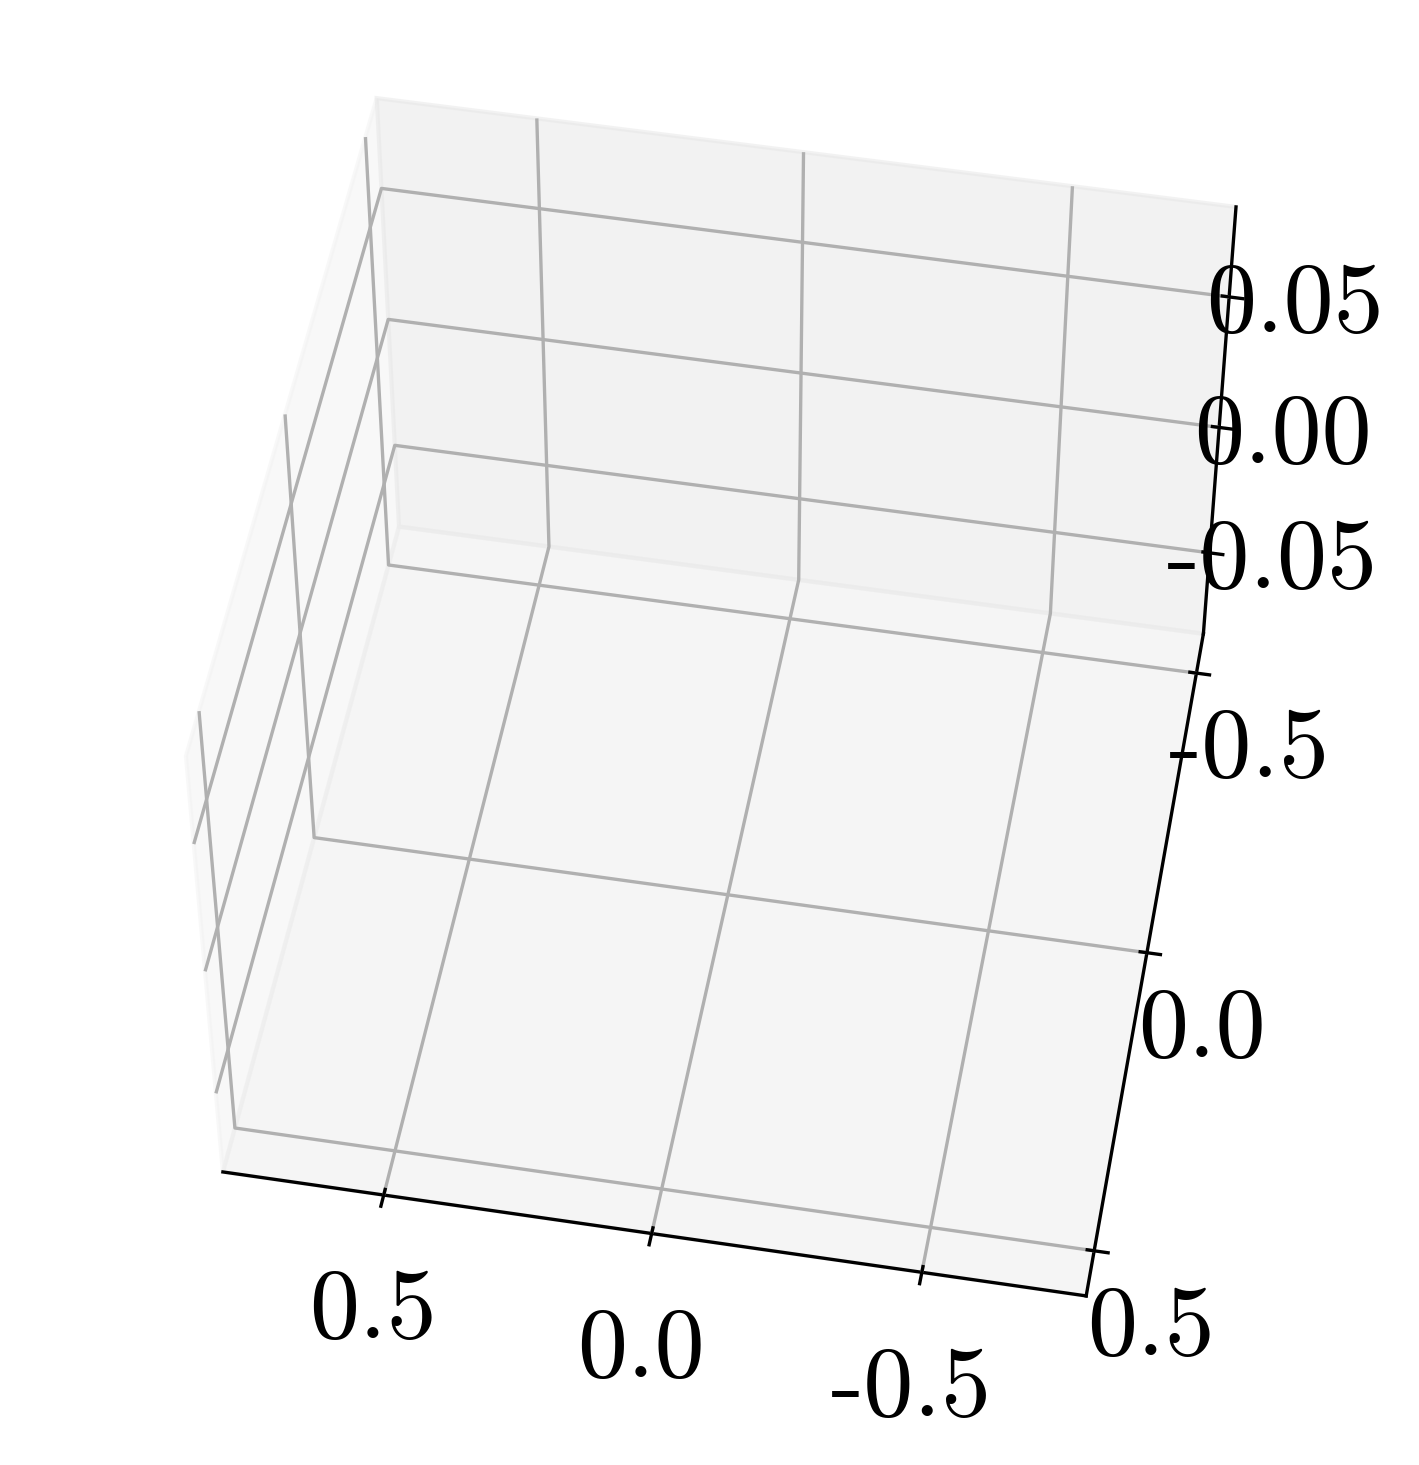

In [63]:
cup_vis.draw_canvas()

In [64]:
cup_vis.draw_points(1, .2)

In [65]:
cup_vis.draw_vectors(4, 500, 10)

In [66]:
import matplotlib

In [67]:
matplotlib.__version__

'3.7.2'

In [68]:
cup_vis.ax.view_init(0, 80, 0, 'y')

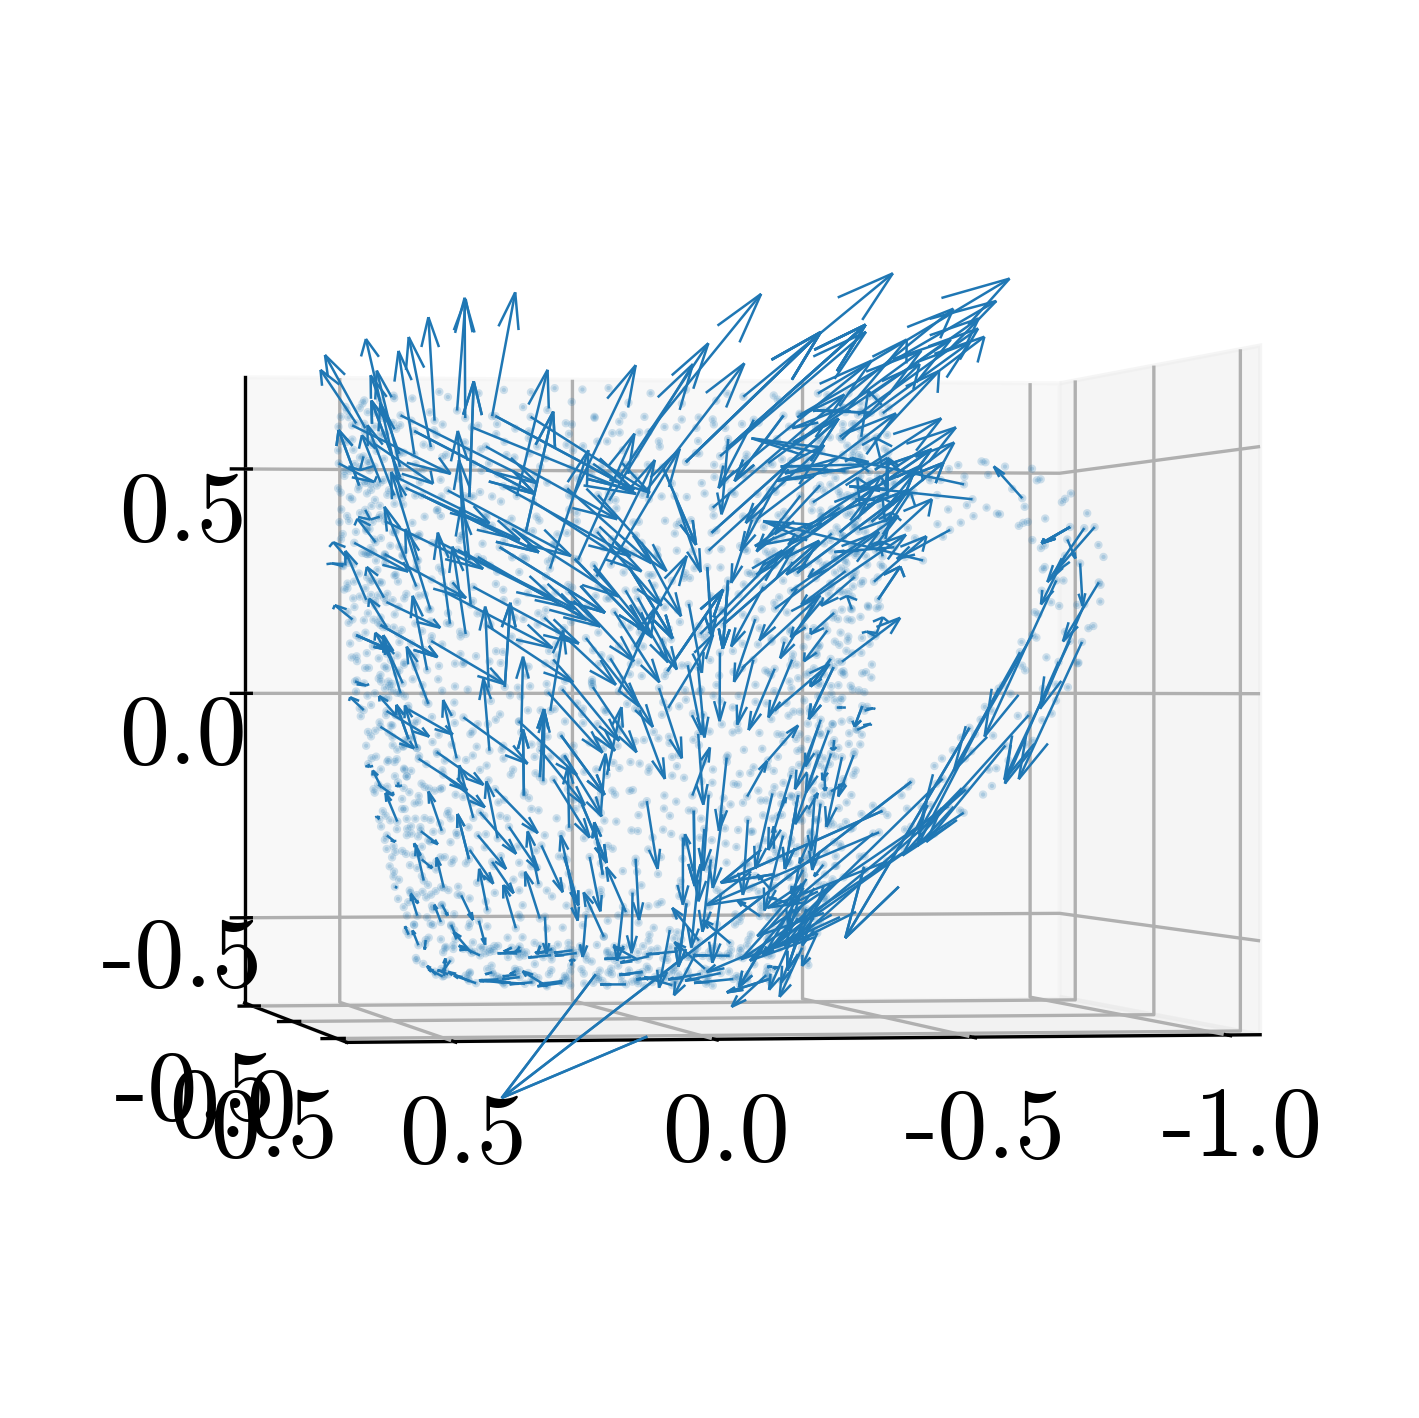

In [69]:
cup_vis.fig